In [1]:
!git clone https://github.com/ehsanul9511/black-boxMIAI.git

Cloning into 'black-boxMIAI'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 139 (delta 91), reused 110 (delta 68), pack-reused 0
Receiving objects: 100% (139/139), 1.28 MiB | 4.63 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [2]:
%cd black-boxMIAI/

/Users/ehsanulkabir/Downloads/tabular/black-boxMIAI


In [3]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
dataset = 'NLSY'

In [7]:
nlsy_data_dict = {
    'name': "NLSY",
    'path': 'data/nlsy_5096.csv',
    'dummy_columns': ['marital8', 'gender', 'race', 'arrestsdli8', 'drug_marijuana',
        'smoking8', 'drinking8', 'sexdrugsdli8', 'sexstrng8'],
    'numeric_columns': ['age','children', 'incarceration', 'income8'],
    'y_column': 'ratelife8',
    'sensitive_column': 'drug_marijuana',
    'sensitive_pos': 'dm_yes',
    'y_pos': "excellent",
    'attack_type': "Random"
}

In [8]:
adult_data_dict = {
    'name': "Adult",
    'path': 'data/Adult_35222.csv',
    'dummy_columns': ["work", "education", "marital", "occupation", "race", "sex"],
    'numeric_columns': ["fnlwgt", "capitalgain", "capitalloss", "hoursperweek"],
    'y_column': 'income',
    'sensitive_column': 'marital',
    'sensitive_pos': 'Married',
    'y_pos': ">50K",
    'attack_type': "Random"
}

In [9]:
gss_data_dict = {
    'name': "GSS",
    'path': 'data/GSS_15235.csv',
    'dummy_columns': ['year', 'marital', 'divorce', 'sex', 'race', 'relig', 'xmovie', 'pornlaw'],
    'numeric_columns': ['childs', 'age', 'educ'],
    'y_column': 'hapmar',
    'sensitive_column': 'xmovie',
    'sensitive_pos': 'x_yes',
    'y_pos': 'nottoohappy',
    "attack_type": "Random"
}

In [10]:
all_data_dict = {
    "Adult": adult_data_dict,
    "GSS": gss_data_dict,
    "NLSY": nlsy_data_dict
}

In [11]:
data_dict = all_data_dict[dataset]

In [12]:
#data = adult_data.data
orig_data = pd.read_csv(data_dict['path'])

In [13]:
if data_dict['name'] == 'GSS':
    orig_data['pornlaw'] = orig_data['pornlaw'].replace({"illegalillegal8": "illegal"})
elif data_dict['name'] == 'NLSY':
    orig_data = orig_data.drop(['id'], axis=1)

In [14]:
data = orig_data.copy()

In [15]:
data

,marital8,gender,age,race,children,arrestsdli8,incarceration,income8,smoking8,drinking8,drug_marijuana,sexdrugsdli8,sexstrng8,ratelife8
0,married,female,26,hispanic,1,a_no,0,515,smk_no,drnk_yes,dm_no,s_no,ss_no,good
1,nevermarried,male,24,hispanic,-1,a_no,0,242,smk_no,drnk_yes,dm_no,s_no,ss_yes,verygood
2,married,female,25,hispanic,2,a_no,0,233,smk_no,drnk_yes,dm_no,s_no,ss_no,excellent
3,nevermarried,male,28,black,-1,a_no,0,387,smk_no,drnk_yes,dm_no,s_no,ss_no,verygood
4,divorced,female,26,nonblhis,1,a_no,0,254,smk_no,drnk_no,dm_no,s_no,ss_no,verygood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,nevermarried,female,26,nonblhis,-1,a_no,0,93,smk_no,drnk_yes,dm_no,s_vskip,ss_vskip,excellent
5092,nevermarried,male,26,nonblhis,-1,a_no,0,1937,smk_no,drnk_yes,dm_no,s_no,ss_no,good
5093,cohabiting,male,25,black,-1,a_no,0,122,smk_yes,drnk_yes,dm_yes,s_no,ss_no,fair
5094,cohabiting,male,25,nonblhis,-1,a_no,0,166,smk_no,drnk_yes,dm_no,s_no,ss_no,excellent


In [16]:
data.columns

Index(['marital8', 'gender', 'age', 'race', 'children', 'arrestsdli8',
       'incarceration', 'income8', 'smoking8', 'drinking8', 'drug_marijuana',
       'sexdrugsdli8', 'sexstrng8', 'ratelife8'],
      dtype='object')

In [17]:
data_dict

{'name': 'NLSY',
 'path': 'data/nlsy_5096.csv',
 'dummy_columns': ['marital8',
  'gender',
  'race',
  'arrestsdli8',
  'drug_marijuana',
  'smoking8',
  'drinking8',
  'sexdrugsdli8',
  'sexstrng8'],
 'numeric_columns': ['age', 'children', 'incarceration', 'income8'],
 'y_column': 'ratelife8',
 'sensitive_column': 'drug_marijuana',
 'sensitive_pos': 'dm_yes',
 'y_pos': 'excellent',
 'attack_type': 'Random'}

In [18]:
data = data.dropna()
data = pd.get_dummies(data, columns=data_dict['dummy_columns'])
numerical_features = data_dict['numeric_columns']
scaler = StandardScaler()
scaler.fit(data[numerical_features])
data[numerical_features] = scaler.transform(data[numerical_features])

In [19]:
def draw_plot(result_df, name, flip_column_different=False, metric="accuracy"):
    if flip_column_different:
        vals = result_df.copy()
        vals.index = vals['Subgroup Name'].values
        vals = vals.drop(['Subgroup Name', 'Count'], axis=1)
        vals = vals.transpose()
        rownames = vals.index.values
    else:
        rownames = result_df['Subgroup Name'].values
        vals = result_df.drop(['Subgroup Name', 'Count'], axis=1)

    x = np.arange(len(rownames))  # convert range to numpy array
    width = len(x) 
    multiplier = 0

    fig, ax = plt.subplots(figsize=(16, 4),layout='constrained')

    tick_locations = []

    for attribute, measurement in vals.items():
        # print(measurement)
        offset = width * 2 * multiplier
        # print(x *10 + offset)
        loc = x * width * 2 + offset
        tick_locations += loc.tolist()
        rects = ax.bar(x * width * 2 + offset, measurement, width, label=attribute)
        # print(rects)
        ax.bar_label(rects, labels=[f"{round(h, 2)}" for h in measurement], padding=3)
        multiplier += width * 1.25
        if multiplier == 1:
            break

    ax.set_ylabel(f'ASR {metric}')
    ax.set_title(f'Disparate Vulnerability {name}')
    ax.set_xticks(tick_locations, rownames.tolist() * vals.shape[1], rotation=90)  # add half width to center the ticks
    if flip_column_different:
        ax.legend(loc='upper left', ncol=3, bbox_to_anchor=(0, 2))
    else:
        ax.legend(loc='upper left', ncol=3, bbox_to_anchor=(0, 1.5))
    ax.set_ylim(0, 1)

    plt.show()

In [20]:
def get_random_data(num, one_hot_columns, orig_data):
    orig_columns = orig_data.columns
    unique_val_dict = {}
    for col in orig_columns:
        unique_val_dict[col] = orig_data[col].unique()
        if col not in data_dict['dummy_columns'] and col != data_dict['y_column']:
            unique_val_dict[col] = [np.min(unique_val_dict[col]), np.max(unique_val_dict[col])]
    # print(unique_val_dict)
    x = {}
    for col in orig_columns:
        if col in data_dict['dummy_columns'] or col == data_dict['y_column']:
            # print()
            np.random.seed(42)
            x[col] = np.random.choice(unique_val_dict[col].tolist(), num, replace=True)
        else:
            np.random.seed(42)
            # print(unique_val_dict[col][0], unique_val_dict[col][1])
            # x[col] = [random.randint(unique_val_dict[col][0], unique_val_dict[col][1])] * 2
            x[col] = np.random.randint(unique_val_dict[col][0], unique_val_dict[col][1], size=num)
            # x[col] = 0

    # x = pd.DataFrame([x], columns = orig_data.columns)
    x = pd.DataFrame.from_dict(x)
    # print(x)
    xp = x.copy()
    x = pd.get_dummies(x, columns=data_dict['dummy_columns'])
    x = pd.DataFrame(x, columns=one_hot_columns)
    x.fillna(0, inplace=True)
    numerical_features = data_dict['numeric_columns']
    x[numerical_features] = scaler.transform(x[numerical_features])

    return x, xp


In [21]:
from sklearn.model_selection import train_test_split

X = data.drop(data_dict['y_column'], axis=1)
y = data[data_dict['y_column']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

np.random.seed(42)

# Create an instance of MLPClassifier with random_state set to 42
# clf = MLPClassifier(random_state=42, hidden_layer_sizes=(30, 10, 2))

clf = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# clf = RandomForestClassifier()
# clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [23]:
score = clf.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.30686274509803924


In [24]:
# Assuming clf is the trained decision tree classifier
predicted_labels = clf.predict(X_test)

In [25]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [26]:
sensitive_attr = data_dict['sensitive_column']
sensitive_columns = list(filter(lambda x: sensitive_attr in x, data.columns))
attr_len = len(sensitive_attr) + 1
sensitive_values = [val[attr_len:] for val in sensitive_columns]

In [28]:
# random_oh_df, random_df = get_random_data(10000, data.columns, orig_data)
# for _ in range(1):
#     clf.predict([random_oh_df.drop(data_dict['y_column'], axis=1).iloc[0].copy()]* 100000)

In [27]:
# Random Attack

random_oh_df, random_df = get_random_data(20000, data.columns, orig_data)
X_random = random_oh_df.drop(data_dict['y_column'], axis=1)
default_cols = X_random.columns
# y = random_oh_df[data_dict['y_column']]

prediction_columns = []
for sensitive_value in sensitive_values:
    X_random[sensitive_attr + "_" + sensitive_value] = pd.Series(np.ones(X_random.shape[0]), index=X_random.index)
    for other_value in sensitive_values:
        if other_value != sensitive_value:
            X_random[sensitive_attr + "_" + other_value] = pd.Series(np.zeros(X_random.shape[0]), index=X_random.index)

    newcolname = "prediction_" + sensitive_value
    prediction_columns.append(newcolname)
    X_random[newcolname] = pd.Series(clf.predict(X_random[default_cols]), index=X_random.index)
    X_random["confidence_" + sensitive_value] = pd.Series(np.max(clf.predict_proba(X_random[default_cols]), axis=1), 
                                                         index=X_random.index)

X_random['all_predictions'] = X_random[prediction_columns].apply(pd.Series.unique, axis=1)

# X_random = X_random[X_random['all_predictions'].apply(lambda x: len(x)==len(sensitive_values))]

new_df = None

dfs = []

for sensitive_value in sensitive_values:
    X_temp = X_random[default_cols].copy()

    X_temp[sensitive_attr + "_" + sensitive_value] = pd.Series(np.ones(X_temp.shape[0]), index=X_random.index)
    for other_value in sensitive_values:
        if other_value != sensitive_value:
            X_temp[sensitive_attr + "_" + other_value] = pd.Series(np.zeros(X_temp.shape[0]), index=X_random.index)

    X_temp[data_dict['y_column']] = X_random["prediction_" + sensitive_value]
    X_temp['confidence'] = X_random["confidence_" + sensitive_value]

    dfs.append(X_temp.copy())

random_oh_df = pd.concat(dfs, ignore_index=True)

new_df = random_oh_df.copy()

random_oh_df = random_oh_df[random_oh_df['confidence'].apply(lambda x: x > 0.8)].drop('confidence', axis=1)
# X_test = random_oh_df.drop(data_dict['y_column'], axis=1)
# y_test = random_oh_df[data_dict['y_column']]


<Axes: xlabel='confidence', ylabel='Count'>

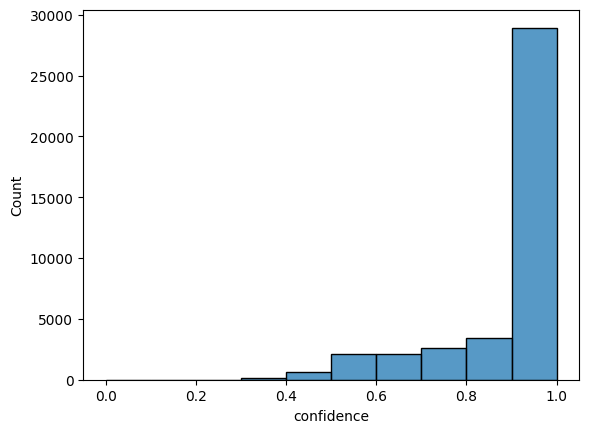

In [28]:
sns.histplot(data=new_df, x='confidence', bins=[i/10 for i in range(11)])

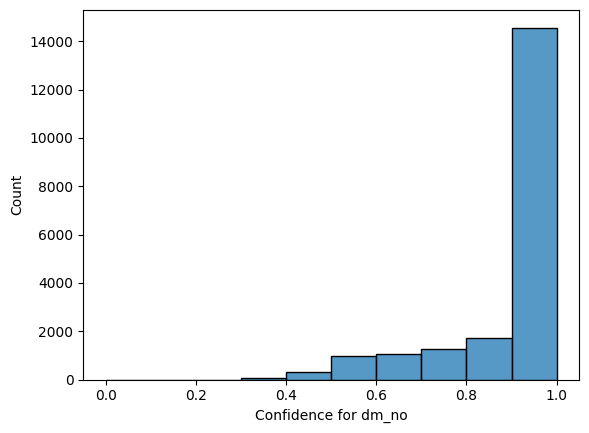

In [29]:
ax = sns.histplot(data=new_df[new_df[sensitive_attr + "_" + sensitive_values[0]]==1], x='confidence', bins=[i/10 for i in range(11)])
ax.set_xlabel(f'Confidence for {sensitive_values[0]}')
plt.show()

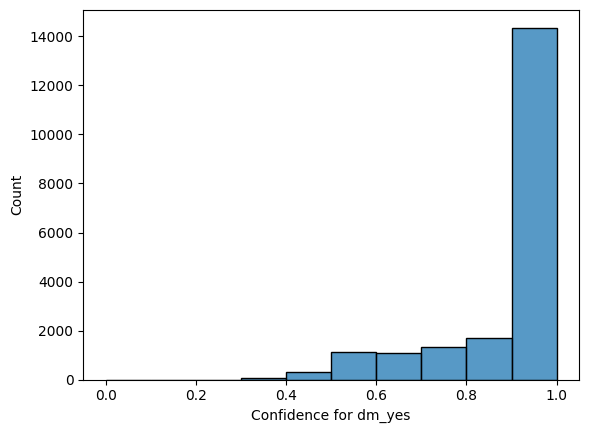

In [30]:
ax = sns.histplot(data=new_df[new_df[sensitive_attr + "_" + sensitive_values[1]]==1], x='confidence', bins=[i/10 for i in range(11)])
ax.set_xlabel(f'Confidence for {sensitive_values[1]}')
plt.show()

In [31]:
# # Random Attack

# def get_random_query_data():
#     random_oh_df, random_df = get_random_data(10000, data.columns, orig_data)
#     X_random = random_oh_df.drop(data_dict['y_column'], axis=1)
#     # y = random_oh_df[data_dict['y_column']]



#     # Assuming X_test is the test set and y_test is the true labels
#     attack_dataset = []
#     for i in tqdm(range(len(X_random)), disable=False):
#         # Get the predicted label and true label for this record
#         #pred_label = predicted_labels[i]
#         # true_label = y_test.iloc[i]
        
#         # Check if the predicted label matches the true label for only one possible value of the sensitive attribute
#         num_matches = 0
#         matched_value = None
#         # sensitive_values = ["Married", "Single"]
#         records = []
#         y_preds = []
#         # records = [record.copy() for _ in range(len(sensitive_values))]
#         for sensitive_value in sensitive_values:
#             record = X_random.iloc[i].copy()
#             record[sensitive_attr + "_" + sensitive_value] = 1

#             for other_value in sensitive_values:
#                 if other_value != sensitive_value:
#                     record[sensitive_attr + "_" + other_value] = 0
            
#             # print(record[['marital_Married']])
#             y_pred = clf.predict([record])[0]
#             # probabilities = clf.predict_proba([record])
#             # y_pred = model.predict(record, )
#             # print(clf.predict_proba([record]))
#             # print(y_pred)
#             if y_pred in y_preds:
#                 break
#             else:
#                 y_preds.append(y_pred)
#             record[data_dict['y_column']] = y_pred

#             records.append(record)

#         # print(y_preds)

#         if len(records) != len(sensitive_values):
#             continue
#         else:
#             attack_dataset += records

#     random_oh_df = pd.DataFrame(attack_dataset)

#     return random_oh_df



# if data_dict["attack_type"] == "Random":
#     random_oh_df = get_random_query_data()

#     X_test = random_oh_df.drop(data_dict['y_column'], axis=1)
#     y_test = random_oh_df[data_dict['y_column']]


In [32]:
# pd.crosstab(random_oh_df['marital_Married'], random_oh_df['income'])

In [33]:
random_oh_df.shape

(32368, 41)

In [35]:
# LOMIA Attack

# Assuming X_test is the test set and y_test is the true labels

attack_dataset = []
for i in tqdm(range(len(X_test))):
    # Get the predicted label and true label for this record
    #pred_label = predicted_labels[i]
    true_label = y_test.iloc[i]
    
    # Check if the predicted label matches the true label for only one possible value of the sensitive attribute
    num_matches = 0
    matched_value = None
    # sensitive_values = ["Married", "Single"]
    for sensitive_value in sensitive_values:
        record = X_test.iloc[i].copy()
        record[sensitive_attr + "_" + sensitive_value] = 1

        for other_value in sensitive_values:
            if other_value != sensitive_value:
                record[sensitive_attr + "_" + other_value] = 0
        
        # Check if the predicted label matches the true label for this sensitive value
        # if clf.predict([record])[0] == true_label:
        if clf.predict(record.to_numpy().reshape(1, -1))[0] == true_label:
            num_matches += 1
            matched_value = sensitive_value
            
    # If there is only one match, label the record with the matched value
    if num_matches == 1:
        record = X_test.iloc[i].copy()
        record[sensitive_attr + "_" + matched_value] = 1

        for other_value in sensitive_values:
            if other_value != matched_value:
                record[sensitive_attr + "_" + other_value] = 0
        
        # record[data_dict['y_column']] = (true_label == data_dict['y_pos'])
        record[data_dict['y_column']] = true_label
        attack_dataset.append(record)


100%|██████████| 1020/1020 [00:00<00:00, 2836.77it/s]


In [36]:
# Convert the attack dataset to a pandas DataFrame
attack_df = pd.DataFrame(attack_dataset)

unique_values = data[data_dict['y_column']].unique()

# create dictionary to map string values to numeric values
mapping_dict = {value: index for index, value in enumerate(unique_values)}

attack_df[data_dict['y_column']] = attack_df[data_dict['y_column']].map(mapping_dict)

# Split the DataFrame into input and output variables
X_attack = attack_df.drop([sensitive_attr + "_" + val for val in sensitive_values], axis=1) 

# X_attack = attack_df.drop(["marital_Married", "marital_Single"], axis=1) 
# y_attack = attack_df[["marital_Married"]]
y_attack = attack_df[[sensitive_attr + "_" + data_dict['sensitive_pos']]]

In [37]:
# Assuming X_attack and y_attack are the attack dataset
# attack_model = DecisionTreeClassifier()
# attack_model = MLPClassifier()
attack_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
attack_model.fit(X_attack, y_attack)

# from xgboost import XGBClassifier

# attack_model = XGBClassifier()
# attack_model.fit(X_attack, y_attack)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

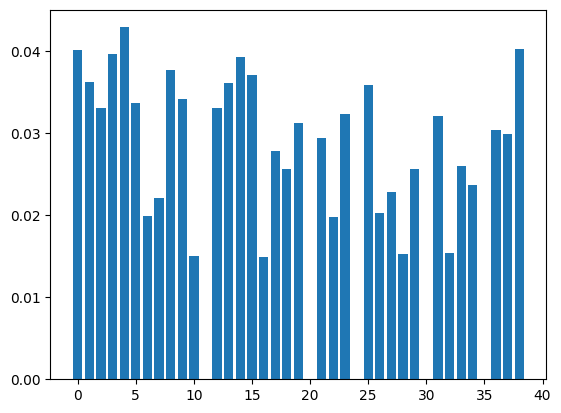

In [38]:
if isinstance(attack_model, MLPClassifier):
    weights = attack_model.coefs_[0]

    # calculate the absolute values of the weights and sum them across all hidden units
    abs_weights = np.abs(weights)
    feature_importance_scores = abs_weights.sum(axis=1)

    # normalize the feature importance scores
    feature_importance_scores /= feature_importance_scores.sum()

    # print the feature importance scores
    plt.bar(range(len(feature_importance_scores)),feature_importance_scores)

In [39]:
X_attack.columns

Index(['age', 'children', 'incarceration', 'income8', 'marital8_cohabiting',
       'marital8_divorced', 'marital8_m_ivskip', 'marital8_m_vskip',
       'marital8_married', 'marital8_nevermarried', 'marital8_separated',
       'marital8_widowed', 'gender_female', 'gender_male', 'race_black',
       'race_hispanic', 'race_mixed', 'race_nonblhis', 'arrestsdli8_a_no',
       'arrestsdli8_a_yes', 'smoking8_smk_dontknow', 'smoking8_smk_no',
       'smoking8_smk_refuse', 'smoking8_smk_yes', 'drinking8_drnk_dontknow',
       'drinking8_drnk_no', 'drinking8_drnk_refuse', 'drinking8_drnk_yes',
       'sexdrugsdli8_s_dontknow', 'sexdrugsdli8_s_no', 'sexdrugsdli8_s_refuse',
       'sexdrugsdli8_s_vskip', 'sexdrugsdli8_s_yes', 'sexstrng8_ss_dontknow',
       'sexstrng8_ss_no', 'sexstrng8_ss_refuse', 'sexstrng8_ss_vskip',
       'sexstrng8_ss_yes', 'ratelife8'],
      dtype='object')

In [40]:
# Assuming X_test is the original dataset and y_test is the true sensitive attributes (if available)
def preprocess_attack_data(data):
    X = data.drop([sensitive_attr + "_" + val for val in sensitive_values], axis=1)
    y = data[sensitive_attr + "_" + data_dict['sensitive_pos']]

    X[data_dict['y_column']] = X[data_dict['y_column']].map(mapping_dict)

    feature_order = X_attack.columns
    X = X[feature_order]
    missing_value_rows = X.notna().all(axis=1)
    X = X[missing_value_rows]
    y = y[missing_value_rows]
    return X, y

In [41]:
def preprocess_attack_data_w_high_conf(data):
    X = data.drop([data_dict['y_column']], axis=1)

    columns = X.columns

    data['confidence'] = pd.Series(np.max(clf.predict_proba(data[columns]), axis=1), 
                                                         index=data.index)
    
    data = data[data['confidence']> 0.9].drop(['confidence'], axis=1)

    X = data.drop([sensitive_attr + "_" + val for val in sensitive_values], axis=1)
    y = data[sensitive_attr + "_" + data_dict['sensitive_pos']]

    X[data_dict['y_column']] = X[data_dict['y_column']].map(mapping_dict)

    feature_order = X_attack.columns
    X = X[feature_order]
    missing_value_rows = X.notna().all(axis=1)
    X = X[missing_value_rows]
    y = y[missing_value_rows]
    return X, y

In [42]:
X, y = preprocess_attack_data(data)
# X, y = preprocess_attack_data_w_high_conf(data)
# random_oh_df = get_random_query_data()
# X, y = preprocess_attack_data(random_oh_df)
# X, y = X_attack, pd.Series(np.array(y_attack).reshape(-1), index=X_attack.index)

In [43]:
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score

In [44]:
def compare(evaluation_metric, flip_column_different, override_flip_vulnerable=None):

    if data_dict['name'] == 'GSS':
        attrs = ["race", "sex", "pornlaw", "relig"]
    elif data_dict['name'] == 'Adult':
        attrs = ["race", "sex", "education"]
    elif data_dict['name'] == 'NLSY':
        attrs = ["race", "gender", "marital8"]

    result_df_dict = {}

    # evaluation_metric = "f1"

    def eval_score(y_test, y_pred):
        if evaluation_metric == "accuracy":
            return accuracy_score(y_test, y_pred)
        elif evaluation_metric == "f1":
            return f1_score(y_test, y_pred)
        elif evaluation_metric == 'precision':
            return precision_score(y_test, y_pred)
        elif evaluation_metric == 'recall':
            return recall_score(y_test, y_pred)
        elif evaluation_metric == "fpr":
            # print(y_test)
            fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_pred.to_numpy())
            auc_score = roc_auc_score(y_test.to_numpy(), y_pred.to_numpy())
            return fpr[1]  # FPR at a fixed TPR of 0.5

    flip_column_different = flip_column_different

    if data_dict['name'] == "NLSY":
        flip_column = "marital8"
        flip_vulnerable = "nevermarried"
    elif data_dict['name'] == "GSS":
        flip_column = "pornlaw"
        flip_vulnerable = "legal"

    if override_flip_vulnerable is not None:
        flip_vulnerable = override_flip_vulnerable

    flip_columns = list(filter(lambda x: flip_column in x, X.columns))
    flip_target = flip_column + "_" + flip_vulnerable

    for attr in attrs:

        # attr = "race"

        attr_columns = list(filter(lambda x: attr in x, X.columns))

        attr_column_indices = {}

        for col in attr_columns:
            attr_column_indices[col] = (X[col]==1).to_numpy()

        attr_name_len = len(list(attr_column_indices.keys())[0].split("_")[0]) + 1
        rows= []
        for col in attr_column_indices:
            row_dict = {}
            row_dict['Subgroup Name'] = col[attr_name_len:]
            indices = attr_column_indices[col]

            row_dict['Count'] = sum(indices)

            X_subset = X[indices].copy()
            Y_subset = y[indices].copy()

            predicted_sensitive_attributes = attack_model.predict(X_subset)
            
            correct_indices_0 = (predicted_sensitive_attributes == Y_subset).to_numpy()    

            # accuracy = sum(predicted_sensitive_attributes == Y_subset) / len(Y_subset)
            accuracy = eval_score(Y_subset, predicted_sensitive_attributes)
            #print(f'{col} {accuracy}')
            row_dict['Original ASR'] = accuracy

            if flip_column_different:
                X_subset_p = X_subset.copy()
                for col in flip_columns:
                    if col == flip_target:
                        X_subset_p[col] = 1
                    else:
                        X_subset_p[col] = 0

                predicted_sensitive_attributes = attack_model.predict(X_subset_p)

                # accuracy = sum(predicted_sensitive_attributes == Y_subset) / len(Y_subset)
                accuracy = eval_score(Y_subset, predicted_sensitive_attributes)
                #print(f'{col} {col2} {accuracy}')
                row_dict[f'ASR after {flip_column} flipped to {flip_vulnerable}'] = accuracy
            else:
                for col2 in attr_column_indices:
                    if col2 != col or True:
                        X_subset_p = X_subset.copy()
                        X_subset_p[col2] = 1
                        
                        for col3 in attr_column_indices:
                            if col3 != col2:
                                X_subset_p[col3] = 0

                        predicted_sensitive_attributes = attack_model.predict(X_subset_p)

                        # accuracy = sum(predicted_sensitive_attributes == Y_subset) / len(Y_subset)
                        accuracy = eval_score(Y_subset, predicted_sensitive_attributes)
                        #print(f'{col} {col2} {accuracy}')
                        row_dict[f'ASR after value flipped to {col2[attr_name_len:]}'] = accuracy


            column1 = pd.Categorical(X_subset[data_dict['y_column']])
            column2 = pd.Categorical(Y_subset)
            # print(pd.crosstab(column1, column2))

            # row_dict['Subgroup pickmax ratio'] = pd.crosstab(column1, column2).to_numpy().max(axis=1).sum()/X_subset.shape[0]

            rows.append(row_dict)

        result_df = pd.DataFrame(rows)

        result_df_dict[attr] = result_df

    for attr in result_df_dict:
        print(result_df_dict[attr][['Subgroup Name', 'Count']])
        draw_plot(result_df_dict[attr], attr, flip_column_different=flip_column_different, metric=evaluation_metric)


  Subgroup Name  Count
0         black   1359
1      hispanic   1082
2         mixed     49
3      nonblhis   2606


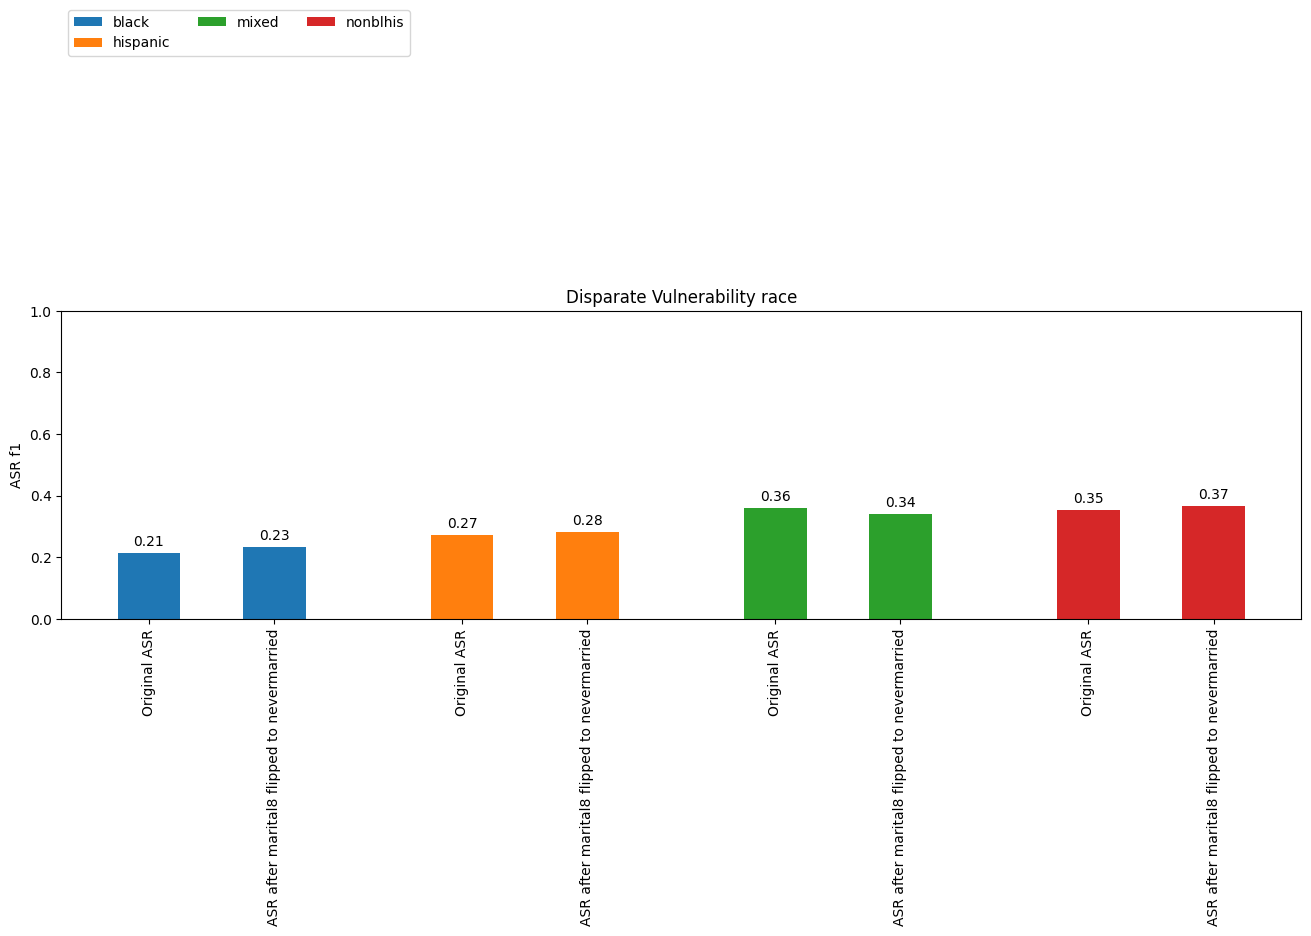

  Subgroup Name  Count
0        female   2623
1          male   2473


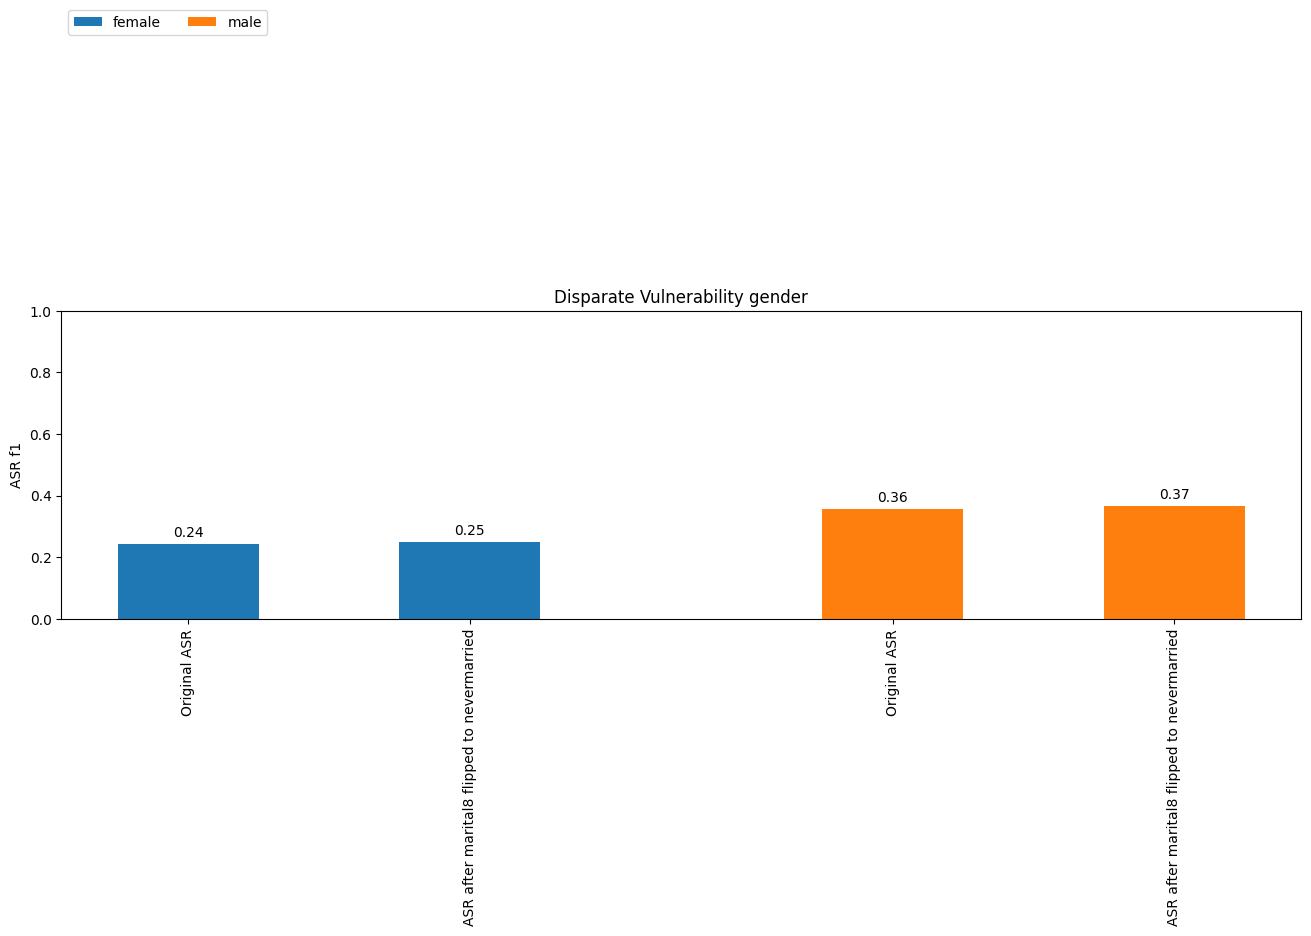

  Subgroup Name  Count
0    cohabiting    967
1      divorced    216
2      m_ivskip      9
3       m_vskip     20
4       married   1456
5  nevermarried   2366
6     separated     60
7       widowed      2


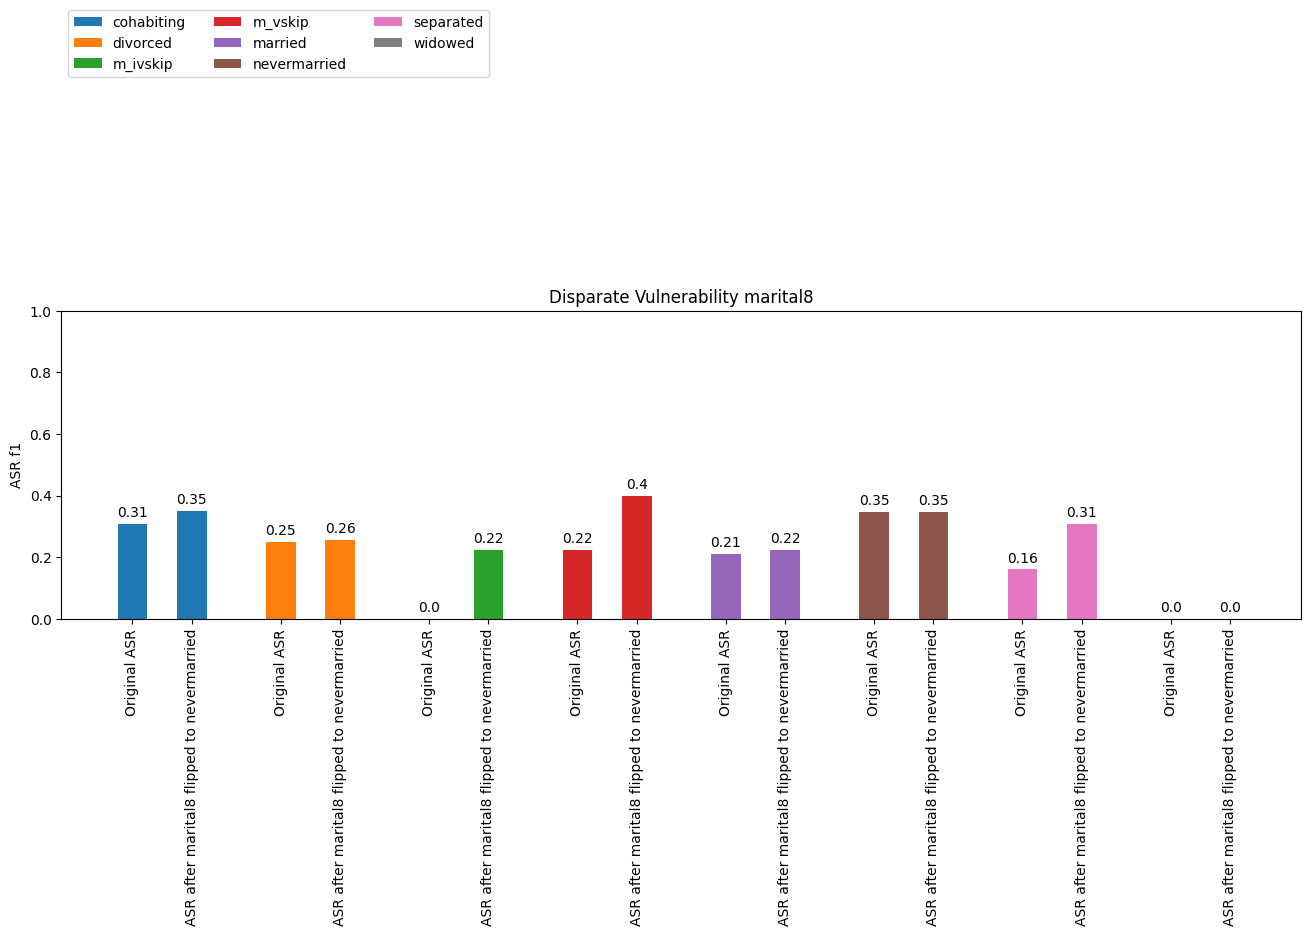

In [45]:
compare('f1', True)

In [51]:
import shap

X_temp, y_temp = preprocess_attack_data(data)

# explainer = shap.Explainer(attack_model, X_temp)

In [114]:
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense


# Extract the weights and biases of the MLPClassifier
weights = attack_model.coefs_
biases = attack_model.intercepts_

# Create a Keras neural network with the same architecture as the MLPClassifier
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_temp.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Set the weights and biases of the Keras neural network to be equal to the MLPClassifier
model.layers[0].set_weights([weights[0], biases[0]])
model.layers[1].set_weights([weights[1], biases[1]])
model.layers[2].set_weights([weights[2], biases[2]])


In [46]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_attack, y_attack)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [56]:
import shap
explainer = shap.Explainer(model, X_temp.astype('float64'))

In [ ]:
sample_idx = 0
sample = X_attack.iloc[sample_idx]
shap_values = explainer.shap_values(sample)

In [57]:
explainer = shap.Explainer(model)
shap_values = explainer(X_attack)

# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

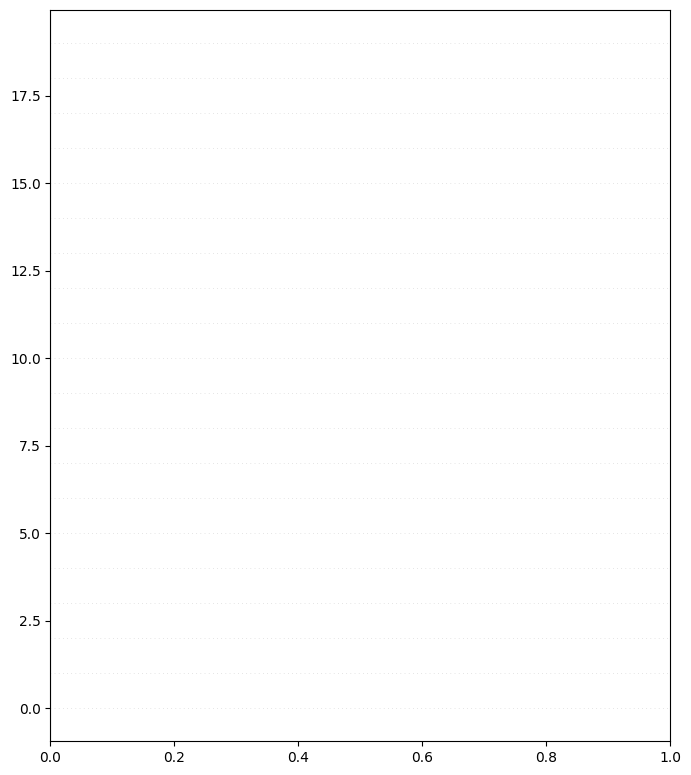

In [69]:
# shap.summary_plot(shap_values, X_attack.iloc[:,:], plot_type="layered_violin", color='coolwarm')
shap.summary_plot(shap_values, X_attack.iloc[:,:], plot_type="violin")

TypeError: unsupported operand type(s) for +: 'bool' and 'str'

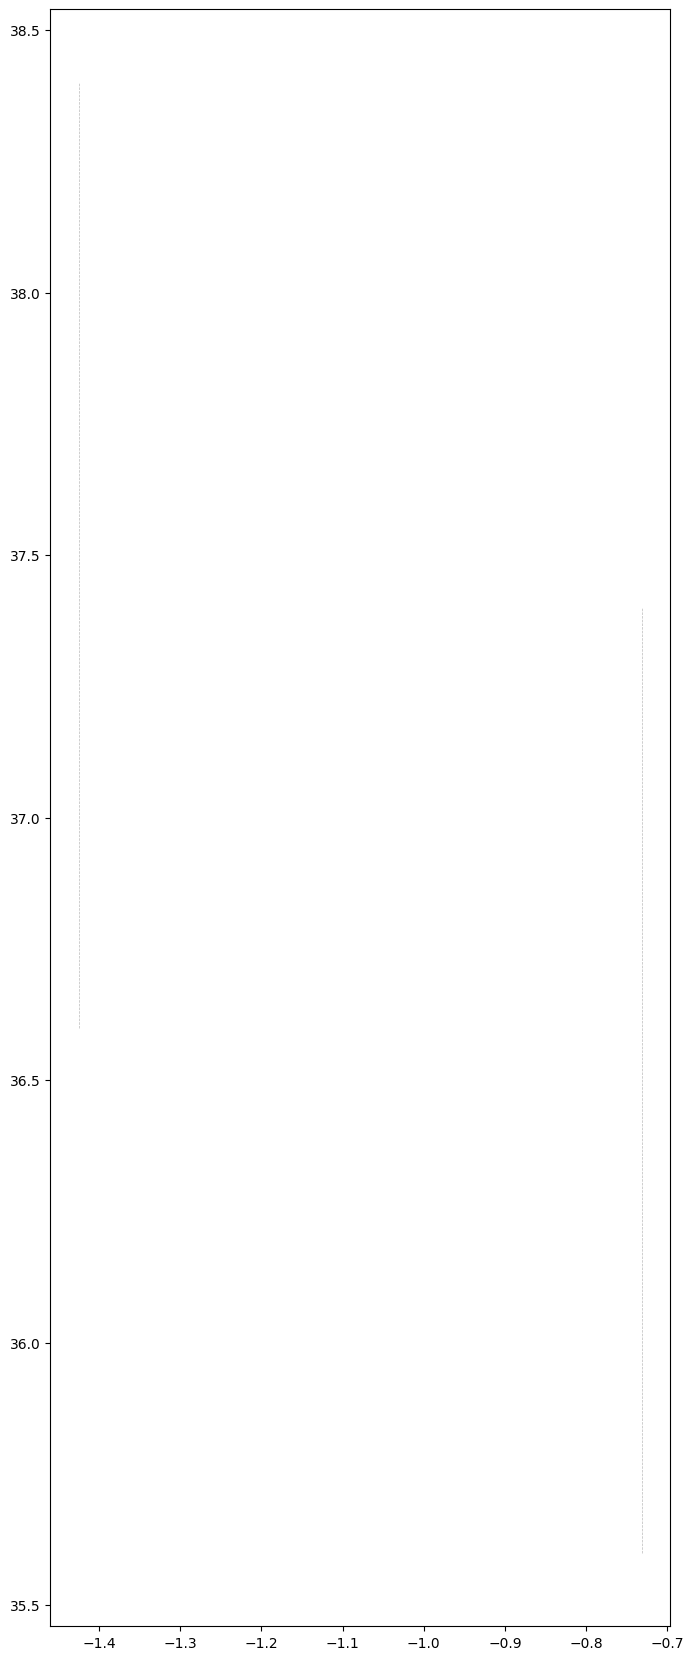

In [60]:
shap.plots.waterfall(shap_values[0], max_display=X_attack.shape[0])

In [61]:
import xgboost
import shap

# train xgboost model on diabetes data:
X1, y1 = shap.datasets.diabetes()
# bst = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

In [65]:
xgboost.DMatrix(X1, label=y1).get_label()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [118]:
shap_values[0]

.values =
array([ 3.9481106e-01, -4.3741024e-01,  2.3341302e-02, -2.0479350e+00,
       -5.7315014e-02,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
       -2.5094250e-01, -6.9456494e-01,  0.0000000e+00,  0.0000000e+00,
       -1.2758857e-01,  0.0000000e+00, -1.3817483e-01,  1.7478375e-02,
        0.0000000e+00, -1.4004943e-02, -3.6159051e-03,  0.0000000e+00,
        0.0000000e+00, -7.0885964e-02,  0.0000000e+00, -4.2709015e-02,
        0.0000000e+00,  3.6547545e-02,  0.0000000e+00,  2.4634823e-02,
        0.0000000e+00,  2.5641677e-01,  0.0000000e+00, -1.7671093e-01,
        0.0000000e+00,  0.0000000e+00, -1.7086138e-01,  0.0000000e+00,
        0.0000000e+00,  1.4115940e-03,  4.0571705e-01], dtype=float32)

.base_values =
-0.40080473

.data =
array([ 0.01896704, -0.79966219, -0.23707618, -0.45161556,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.    

In [ ]:
def f(X):
    return attack_model.predict([X[:,i] for i in range(X.shape[1])]).flatten()

In [ ]:
explainer = shap.KernelExplainer(f, X_attack.iloc[:50,:])
shap_values = explainer.shap_values(X_attack.iloc[299,:], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_attack.iloc[299,:])

Provided model function fails when applied to the provided data set.


ValueError: ignored

In [ ]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

In [ ]:
X

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


In [ ]:
shap.plots.waterfall(shap_values[0])

Exception: ignored

  Subgroup Name  Count
0         black   1298
1         other    763
2         white  13174


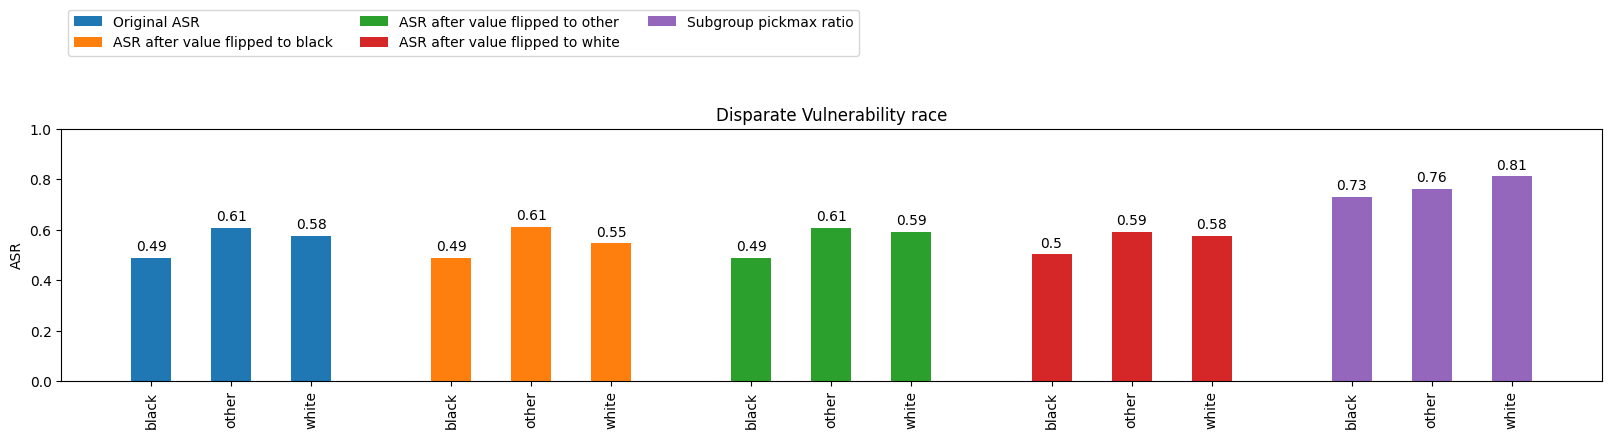

     Subgroup Name  Count
0         dontknow    133
1          illegal   6293
2  illegalillegal8   8156
3            legal    630
4         noanswer     23


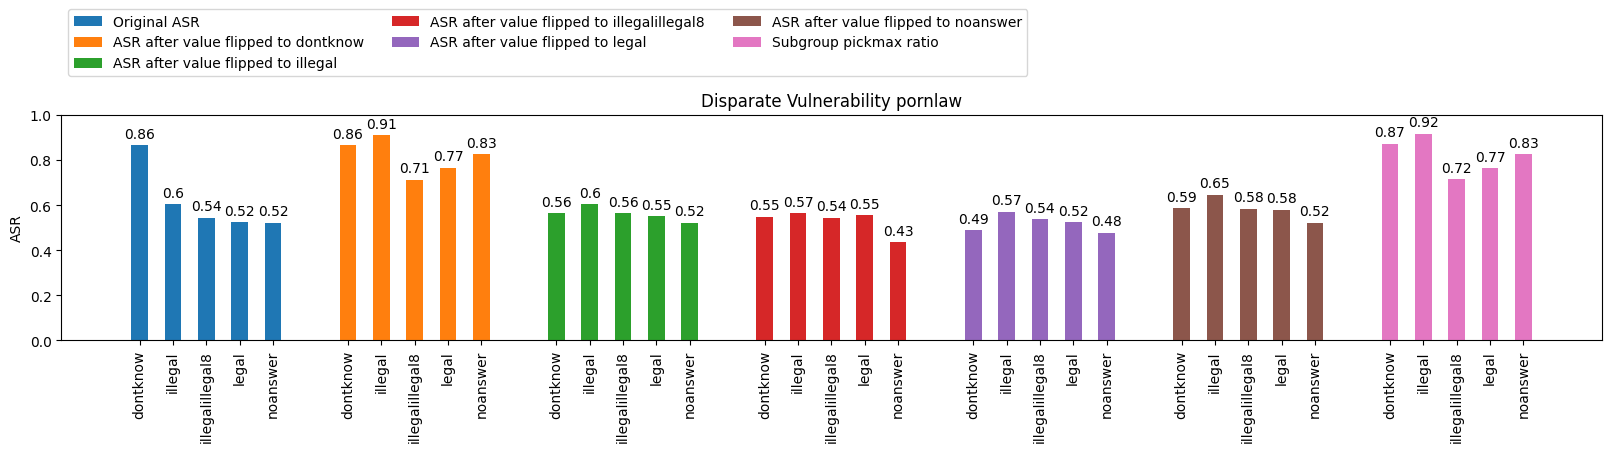

  Subgroup Name  Count
0        female   7981
1          male   7254


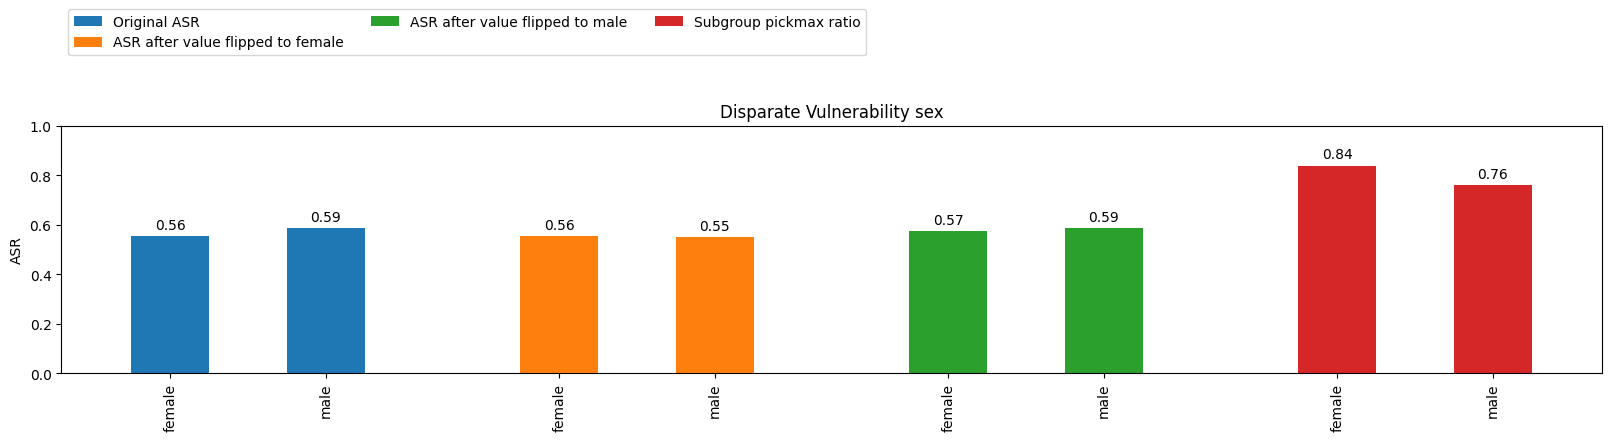

In [ ]:
for attr in result_df_dict:
    print(result_df_dict[attr][['Subgroup Name', 'Count']])
    draw_plot(result_df_dict[attr], attr)

In [ ]:
for attr in result_df_dict:
    print(result_df_dict[attr][['Subgroup Name', 'Count']])
    draw_plot(result_df_dict[attr], attr)

In [ ]:
for attr in result_df_dict:
    print(result_df_dict[attr])

In [ ]:
def draw_plot(result_df, name):
    rownames = result_df['Subgroup Name'].values
    vals = result_df.drop(['Subgroup Name', 'Count'], axis=1)

    x = np.arange(len(rownames))  # convert range to numpy array
    width = len(x) 
    multiplier = 0

    fig, ax = plt.subplots(figsize=(16, 4),layout='constrained')

    tick_locations = []

    for attribute, measurement in vals.items():
        # print(measurement)
        offset = width * 2 * multiplier
        # print(x *10 + offset)
        loc = x * width * 2 + offset
        tick_locations += loc.tolist()
        rects = ax.bar(x * width * 2 + offset, measurement, width, label=attribute)
        # print(rects)
        ax.bar_label(rects, labels=[f"{round(h, 2)}" for h in measurement], padding=3)
        multiplier += width * 1.25
        if multiplier == 1:
            break

    ax.set_ylabel('ASR')
    ax.set_title(f'Disparate Vulnerability {name}')
    ax.set_xticks(tick_locations, rownames.tolist() * vals.shape[1], rotation=90)  # add half width to center the ticks
    ax.legend(loc='upper left', ncol=3, bbox_to_anchor=(0, 1.5))
    ax.set_ylim(0, 1)

    plt.show()

In [ ]:
attack_df.shape

In [ ]:
for attr in result_df_dict:
    print(result_df_dict[attr][['Subgroup Name', 'Count']])
    draw_plot(result_df_dict[attr], attr)

In [ ]:
for attr in result_df_dict:
    draw_plot(result_df_dict[attr], attr)

In [ ]:
predicted_sensitive_attributes = attack_model.predict(X)
accuracy = sum(predicted_sensitive_attributes == y) / len(y)
print("Attack model accuracy:", accuracy)

In [ ]:
attack_success_rates = []

for idx, indices in enumerate([male_indices, female_indices]):
    X_subset = X[indices].copy()
    Y_subset = y[indices].copy()

    # X_subset['income'] = 0
    predicted_sensitive_attributes = attack_model.predict(X_subset)
    correct_indices_0 = (predicted_sensitive_attributes == Y_subset).to_numpy()

    # X_subset['income'] = 1 - X_subset['income']
    X_subset['sex_Male'] = 1 - X_subset['sex_Male']
    X_subset['sex_Female'] = 1 - X_subset['sex_Female']
    predicted_sensitive_attributes = attack_model.predict(X_subset)
    correct_indices_1 = (predicted_sensitive_attributes == Y_subset).to_numpy()

    accuracy = sum(predicted_sensitive_attributes == Y_subset) / len(Y_subset)
    attack_success_rates.append(accuracy)
    # print("Attack model accuracy:", accuracy)

    


In [ ]:
male_indices = (X['sex_Male'] == 1).to_numpy()
female_indices = (X['sex_Female'] == 1).to_numpy()

In [ ]:
high_income_indices = (X['income']==1).to_numpy()
low_income_indices = (X['income']==0).to_numpy()

In [ ]:
married_indices = (y==1).to_numpy()
single_indices = (y==0).to_numpy()

In [ ]:
np.logical_and(female_indices, np.logical_or(np.logical_and(married_indices, high_income_indices), np.logical_and(single_indices, low_income_indices))).sum()/female_indices.sum()

In [ ]:
np.logical_and(male_indices, np.logical_or(np.logical_and(married_indices, high_income_indices), np.logical_and(single_indices, low_income_indices))).sum()/male_indices.sum()

In [ ]:
np.logical_and(female_indices, low_income_indices).sum()/female_indices.sum()

In [ ]:
np.logical_and(male_indices, low_income_indices).sum()/male_indices.sum()

In [ ]:
X[male_indices]

In [ ]:
attack_success_rates = []

for indices in [male_indices, female_indices]:
    predicted_sensitive_attributes = attack_model.predict(X[indices])
    accuracy = sum(predicted_sensitive_attributes == y[indices]) / len(y[indices])
    attack_success_rates.append(accuracy)
    # print("Attack model accuracy:", accuracy)

In [ ]:
import matplotlib.pyplot as plt

# Create the data
subgroups = ["Male", "Female"]


# Create the bar plot
plt.bar(subgroups, attack_success_rates)

for i, rate in enumerate(attack_success_rates):
    plt.text(i, rate + 0.01, f"{rate:.2f}", ha="center")

# Set the labels
plt.xlabel("Subgroup")
plt.ylabel("Attack Success Rate")
plt.ylim(0, np.max(attack_success_rates) + 0.2)
plt.title("Bar Plot of Attack Success Rates by Subgroup")

# Show the plot
plt.show()

In [ ]:
attack_success_rates = []

for idx, indices in enumerate([male_indices, female_indices]):
    X_subset = X[indices].copy()
    Y_subset = y[indices].copy()

    # X_subset['income'] = 0
    predicted_sensitive_attributes = attack_model.predict(X_subset)
    correct_indices_0 = (predicted_sensitive_attributes == Y_subset).to_numpy()

    # X_subset['income'] = 1 - X_subset['income']
    X_subset['sex_Male'] = 1 - X_subset['sex_Male']
    X_subset['sex_Female'] = 1 - X_subset['sex_Female']
    predicted_sensitive_attributes = attack_model.predict(X_subset)
    correct_indices_1 = (predicted_sensitive_attributes == Y_subset).to_numpy()

    accuracy = sum(predicted_sensitive_attributes == Y_subset) / len(Y_subset)
    attack_success_rates.append(accuracy)
    # print("Attack model accuracy:", accuracy)


In [ ]:
import matplotlib.pyplot as plt

# Create the data
subgroups = ["Male Records\n With Gender Flipped\n to Female", "Female Records\n With Gender Flipped\n to Male"]


# Create the bar plot
plt.bar(subgroups, attack_success_rates)

for i, rate in enumerate(attack_success_rates):
    plt.text(i, rate + 0.01, f"{rate:.2f}", ha="center")

# Set the labels
plt.xlabel("Subgroup")
plt.ylabel("Attack Success Rate")
plt.ylim(0, np.max(attack_success_rates) + 0.2)
plt.title("Bar Plot of Attack Success Rates by Subgroup")

# Show the plot
plt.show()

In [ ]:
attack_success_rates = []
for idx, indices in enumerate([male_indices, female_indices]):
    X_subset = X[indices].copy()
    Y_subset = y[indices].copy()

    # X_subset['income'] = 0
    predicted_sensitive_attributes = attack_model.predict(X_subset)
    correct_indices_0 = (predicted_sensitive_attributes == Y_subset).to_numpy()

    X_subset['income'] = 1 - X_subset['income']
    # X_subset['sex_Male'] = 1 - X_subset['sex_Male']
    # X_subset['sex_Female'] = 1 - X_subset['sex_Female']
    predicted_sensitive_attributes = attack_model.predict(X_subset)
    correct_indices_1 = (predicted_sensitive_attributes == Y_subset).to_numpy()

    accuracy = sum(predicted_sensitive_attributes == Y_subset) / len(Y_subset)
    # print("Attack model accuracy:", accuracy)
    attack_success_rates.append(accuracy)

In [ ]:
import matplotlib.pyplot as plt

# Create the data
subgroups = ["Male Records\n With Income Flipped\n from Orig. Value", "Female Records\n With Income Flipped\n from Orig. Value"]

# Create the bar plot
plt.bar(subgroups, attack_success_rates)

for i, rate in enumerate(attack_success_rates):
    plt.text(i, rate + 0.01, f"{rate:.2f}", ha="center")

# Set the labels
plt.xlabel("Subgroup")
plt.ylabel("Attack Success Rate")
plt.ylim(0, np.max(attack_success_rates) + 0.2)
plt.title("Bar Plot of Attack Success Rates by Subgroup")

# Show the plot
plt.show()

In [ ]:
correct_indices_inverted.to_numpy()

In [ ]:
import random

In [ ]:
idx = random.randInt()
record = X.iloc[]

In [ ]:
for i in range(100):
    for group in ['sex', 'race', 'work', 'occupation']:
        idx = 52
        print(attack_model.predict([X.loc[idx]]))

        group_columns = [c for c in X.columns if c.startswith(group)]
        max_column = np.random.choice(X[group_columns].idxmax(axis=1))
        X.loc[idx, group_columns] = 0
        X.loc[idx, max_column] = 1
        print(attack_model.predict([X.loc[idx]]))


In [ ]:
print(attack_model.predict([X.loc[idx]]))